<center><h2>Density Profiling of 16 Patitions on SSD and HDD Ref Block with Zlib</h2></center>

This report contains 2 experiments:
1. Query 16 partitions Full GenomicsDB (with REF blocks) on <b>SSD</b> with Intel Zlib   
2. Query 16 partitions Full GenomicsDB (with REF blocks) on <b>HDD</b> with Intel Zlib   

Each test picks <strong>65</strong> and <strong>1000</strong> positions from dense, intermediate and sparse variant regions in a partition respectively, then generates genomics query config files (total 6) accordingly.

For each genomics query config file, run query with <em>segment_size, in byte</em> <strong>1000, 5000, 10000</strong> respectively. Repeat each setting 3 times, total <b><i>54</i></b> runs.

Total number of query positions for 65 is 1040 (16x65) and for 1000 is 16000.

Query <b>1000</b> positions over <b>1 partitions</b> is about <b>17 sec, 45 sec and 70 sec</b> for sparse, intermediate and dense regions). With <b>16 partitions</b>, the query times are reduced to <b>4 sec, 6 sec and 6 sec</b>

The graphs show:

* [Wall Clock](#wall_clock) for each test and result comparison
* [CPU%](#cpu_percentile) for each test and result comparison
* [iostats](#iostat) of all tests that were measured.

Color convention:

* <span style="color:blue"><b>Sparse Region</b></span>
* <span style="color:red"><b>Intermediate Region</b></span>
* <span style="color:green"><b>Dense Region</b></span>

The <em>segment_size</em> is represented in diffent color shade and marked as <i>SSnnnn</i> in graph legend.

The profiling were performed at hosts compute-2-28 and compute-2-29:

In [10]:
import sys, os, os.path
import pandas as pd

root_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if not root_path in sys.path:
    sys.path.append(root_path)
from py_scratch.u_parse_plot_result import *
test_root = os.path.join(root_path, '..', 'dev_scratch', 'logs')
target_proj='variant-density'

### 16 Partitions using Intel Zlib with Full GenomicsDB, with SSD and HDD

#### <a name="wall_clock">Wall Clock</a>

The following graphs show the <b>wall clock</b> of SSD.

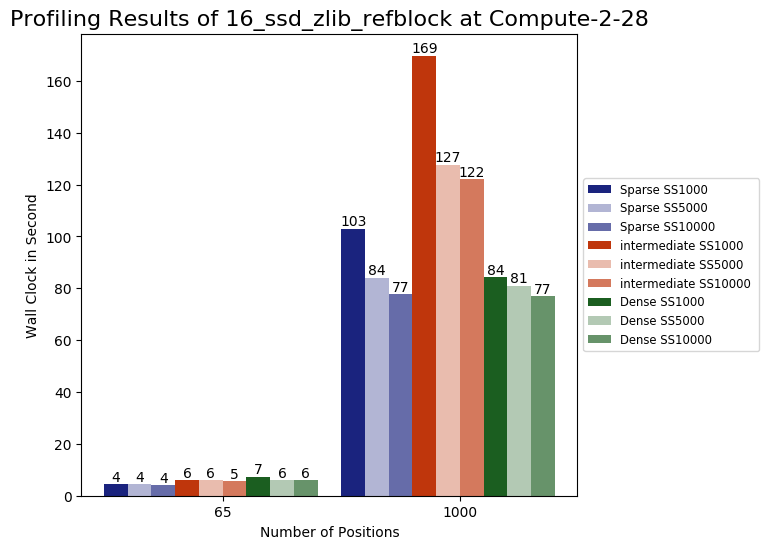

In [11]:
target_run='e-11_16_ssd_zlib_refblock'
_, _ = gen_report_graph(test_root, target_proj, target_run, 1, 0)

The following graphs show the <b>wall clock</b> of HDD.

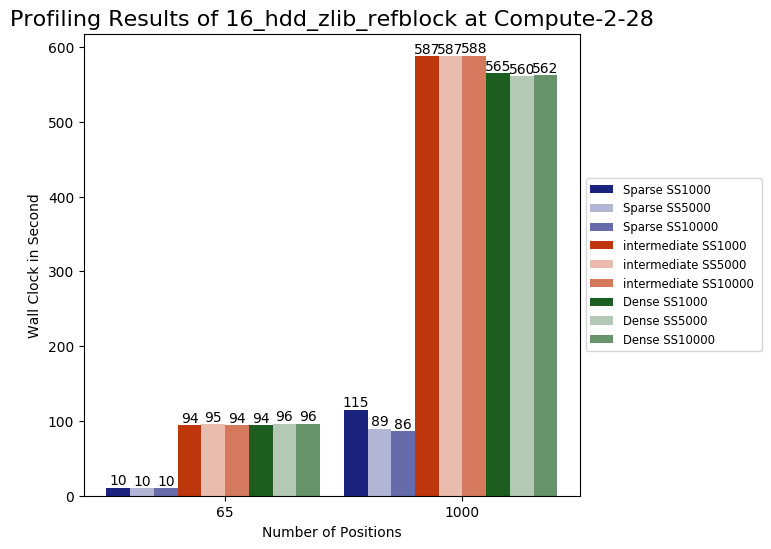

In [13]:
target_run2='e-10_16_hdd_zlib_refblock'
_, _ = gen_report_graph(test_root, target_proj, target_run2, 1, 0)

##### Wall clock Comparison HDD vs SSD

* E-11 (e-11_16_ssd_zlib_refblock) is HDD
* E-10 (e-10_16_hdd_zlib_refblock) is SSD

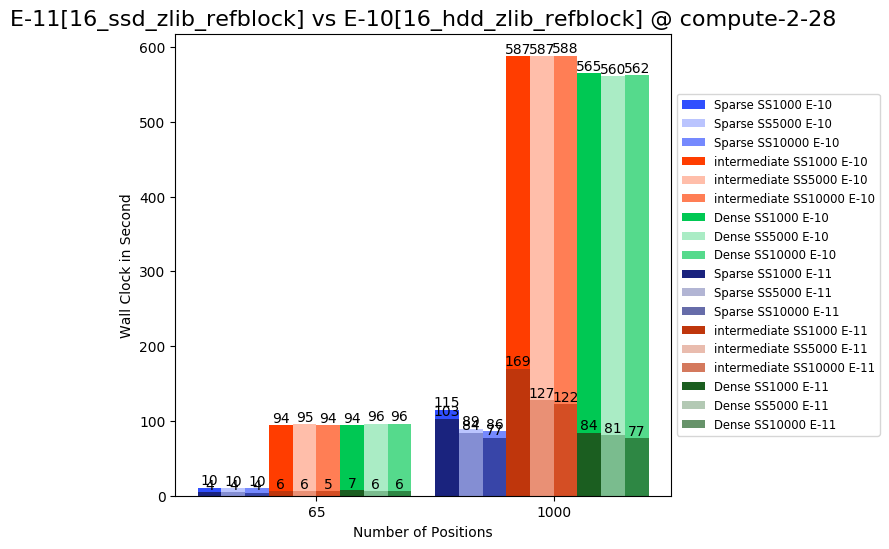

In [14]:
_ = gen_pair_diff_graph(test_root, [('variant-density', target_run), ('variant-density',target_run2)], 1)

#### <a name="cpu_percentile">CPU%</a>

###### <i>CPU%</i> of 16 partitions, Zlib, Ref-block, <i>SSD</i> (e-11_16_ssd_zlib_refblock)
Parallel query with <b>mpirun</b>. the number in graph show the total CPU usage of 16 parallel quering.

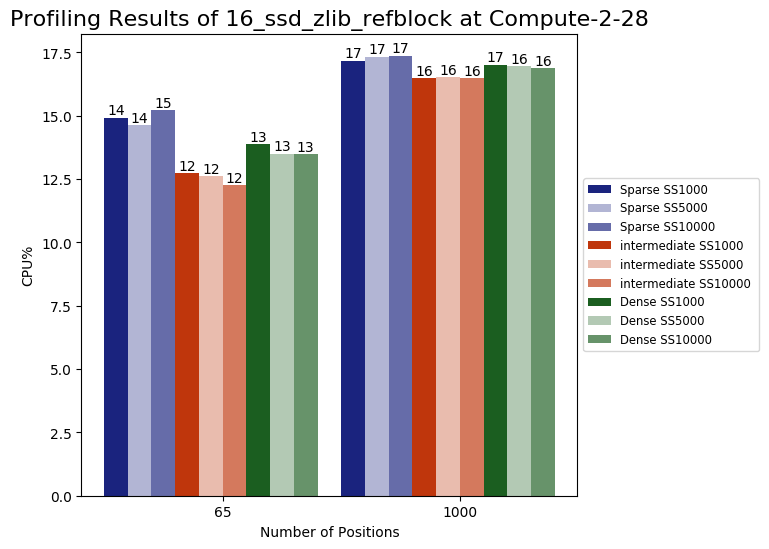

In [15]:
_, _ = gen_report_graph(test_root, target_proj, target_run, 1, 1)

###### <i>CPU%</i> of 16 partitions, Zlib, Ref-block, <i>HHD</i> (e-10_16_hdd_zlib_refblock)
Parallel query with <b>mpirun</b>. the number in graph show the total CPU usage of 16 parallel quering.

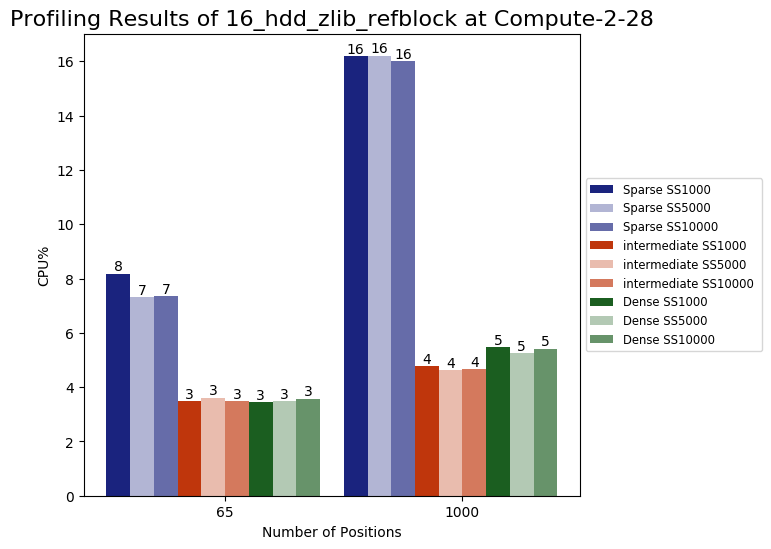

In [6]:
_, _ = gen_report_graph(test_root, target_proj, target_run2, 1, 1)

##### CPU% Comparison HDD vs SSD

* E-11 (e-11_16_ssd_zlib_refblock) is HDD
* E-10 (e-10_16_hdd_zlib_refblock) is SSD

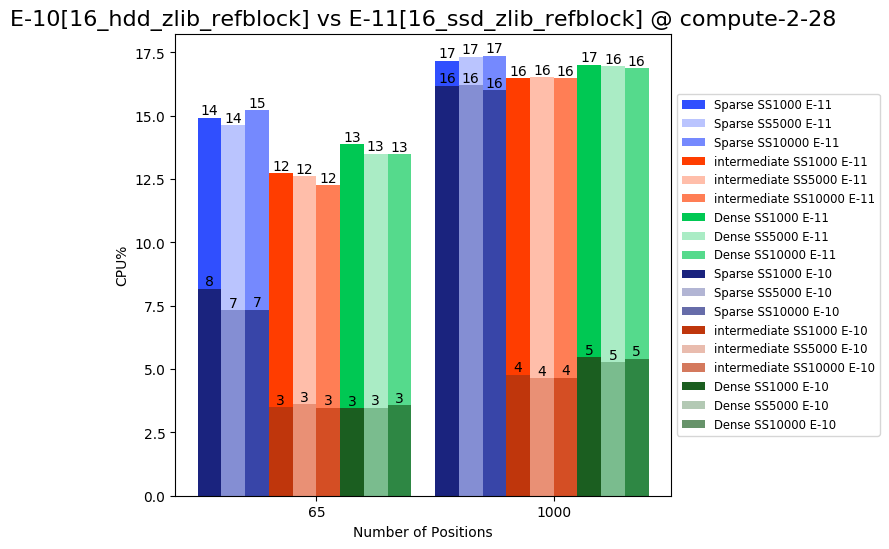

In [7]:
_ = gen_pair_diff_graph(test_root, [('variant-density', target_run2), ('variant-density',target_run)], 1, 1)

### <a name='iostat'></a>Results of iostat Profiling 

The sampling interval is <b>1 second</b>. I only collected data for 1000 postitions with Segment Size 10000.

The table show the average values of iostat logs for profiling
* <b>e-7_zlib</b>:     Intel zlib on HDD 
* <b>e-6_ssd</b>:      Linux zlib on SSD
* <b>e-8_zlib_ssd</b>: Intel zlib on SSD
* <b>e-5_var_only</b>: Linux zlib on HDD
* <b>e-8_zlib_ssd</b>: Intel zlib on SSD using full DB


In [17]:
exps = [
        ('variant-density', 'e-11_16_ssd_zlib_refblock'),
        ('variant-density','e-10_16_hdd_zlib_refblock'),
        ('variant-density','e-9_1_ssd_zlib_refblock'),
        ('variant-density','e-3_ref_block'),
        ('variant-density_noref', 'e-8_zlib_ssd'), 
        ('variant-density_noref', 'e-7_zlib'),
        ('variant-density_noref', 'e-6_ssd'),
        ('variant-density_noref', 'e-5_var_only')
       ]
dfs = get_stats(test_root, exps)
for name, df in dfs.items():
    print()
    print("---------------- For %s%s Region---------------" % (name[0], name[1:]))
    print(df)

iostats for tests:  1_ssd_zlib_refblock, ref_block, zlib_ssd, zlib, ssd, var_only, 16_ssd_zlib_refblock, 16_hdd_zlib_refblock

---------------- For sparse Region---------------
                          %util  avgqu-sz    avgrq-sz        r/s    r_await        rkB/s
1_ssd_zlib_refblock    1.037209  0.010930  155.039767  31.744186   0.446047  3908.465116
ref_block              2.557143  0.032143  101.992857   8.071429   3.123571   885.142857
zlib_ssd               0.392857  0.003571   83.534286   8.642857   0.270714   906.000000
zlib                   2.506667  0.035333   95.857333   7.800000   2.664667   851.466667
ssd                    0.346154  0.003846   90.453077   8.461538   0.293077   933.538462
var_only               2.907143  0.039286   92.197857   8.714286   1.538571   914.571429
16_ssd_zlib_refblock   3.034667  0.033733  145.446800  60.453333   0.378400  7046.933333
16_hdd_zlib_refblock  46.384706  2.772235  149.730706  68.141176  21.447294  7986.588235

---------------- For 